# WEB SCRAPING + PANDAS + DATA VISUALISATION

In [1]:
#import libraries
from bs4 import BeautifulSoup
import requests

In [2]:
#get url
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [100]:
#response
response = requests.get(url)

In [7]:
#getting html
soup = BeautifulSoup(page.text, 'html')

In [110]:
#here are fetch all code related with table especially index 1 table
table_find = soup.find_all('table')[1]

In [112]:
# fetch wikitable sortable 
table_find1 = soup.find_all('table', class_ = 'wikitable sortable')


In [114]:
#table find
table = soup.find_all('table')[1]
table2 = soup.find_all('table')[2]
table3 = soup.find_all('table')[3]

In [225]:
world_titles = table.find_all('th')
world_table_titles =[title.text.strip() for title in world_titles]
    
 print(world_table_titles)   

In [13]:
#import pandas library
import pandas as pd

In [107]:
df = pd.DataFrame(columns = world_table_titles) #data frame

In [123]:
column_data = table.find_all('tr') # whole tr tagline 

for row in column_data[1:]:#start with indexing for removing bracket at the beginning
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data

In [ ]:
df

# DATA PROCESSING

In [223]:
#data analysis
shape_df = df.shape
info_ = df.info()
type_df = type(df)
dtype = df.dtypes
describe = df.describe

In [23]:
df['Rev'] = df['Revenue (USD millions)'] # new column by existing data

In [25]:
df['Rev'] = df['Revenue (USD millions)'].str.replace(',', '') # a new column which has removing coma

In [28]:
df['Rev'] = pd.to_numeric(df['Rev']) # datatype change

In [ ]:
#url
df1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue')

In [ ]:
len(df1) #number of tables

In [215]:
#Below are the 100 largest companies by revenue in 2023 (mostly for fiscal year 2022), according to the Fortune 500 list.
revenue_growth = df1[1]

In [216]:
#Below are the 10 largest private companies by revenue in 2022 (mostly for fiscal year 2021), according to Forbes.
revenue_usd = df1[2]

In [213]:
#The 10 most profitable companies in 2023 according to the Fortune 500.
profits_by_companies = df1[3]


In [212]:
#add a new column
profits_by_companies['profits'] = profits_by_companies['Profits (USD millions)']


# DATA VISUALISATION

In [206]:
#import libraries for visualisation
%matplotlib inline
import matplotlib.pyplot as plt

In [207]:
#x axis
x=profits_by_companies.Name

In [209]:
#y axis
y=profits_by_companies.profits

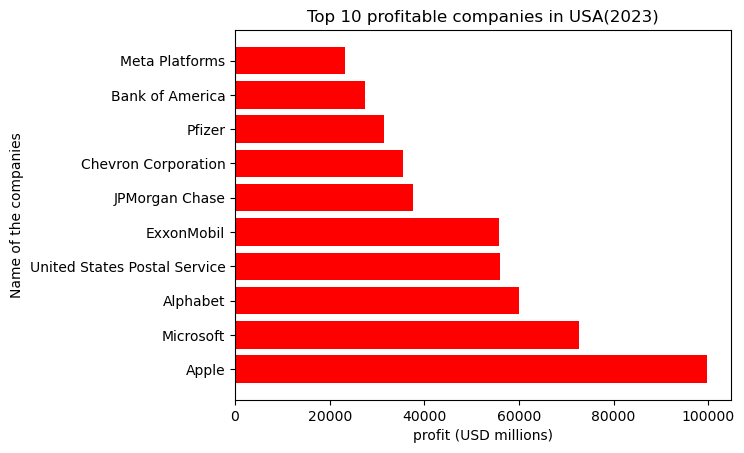

In [211]:
#horizontal bar graph
plt.barh(x,y , color = "red")
plt.title('Top 10 profitable companies in USA(2023)') #title of the graph
plt.xlabel('profit (USD millions)')#x label
plt.ylabel('Name of the companies')#y label
plt.show() 

In [227]:
df.to_csv(r'C:\Users\USER\Desktop\data_analysis\web_companies.csv',index=False)

In [228]:
profits_by_companies.to_csv(r'C:\Users\USER\Desktop\data_analysis\top_profit_companies.csv',index=False)

In [229]:
df.to_csv(r'C:\Users\USER\Desktop\data_analysis\web_companies.json',index=False)

In [230]:
profits_by_companies.to_csv(r'C:\Users\USER\Desktop\data_analysis\top_profit_companies.json',index=False)